In [23]:
from qiskit import QuantumCircuit

def deutsch_function(case: int):

    if case not in [1,2,3,4]:
        raise ValueError("`case` must be 1, 2, 3, or 4.")

    f = QuantumCircuit(2)
    if case in [2,3]:
        f.cx(0,1)
    if case in [3,4]:
        f.x(1)
    return f

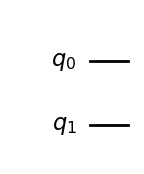

In [76]:
display(deutsch_function(1).draw('mpl'))

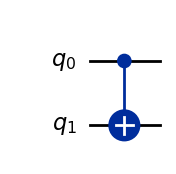

In [77]:
display(deutsch_function(2).draw('mpl'))

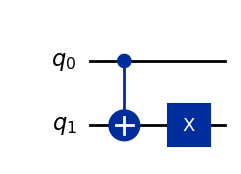

In [78]:
display(deutsch_function(3).draw('mpl'))

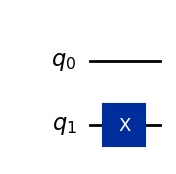

In [79]:
display(deutsch_function(4).draw('mpl'))

In [75]:
def compile_circuit(function: QuantumCircuit):
    """
    Compiles a circuit for use in Deutsch's algorithm.
    """
    n = function.num_qubits - 1
    qc = QuantumCircuit(n + 1, n)

    qc.x(n)
    qc.h(range(n + 1))

    qc.barrier()
    qc.compose(function, inplace=True)
    qc.barrier()

    qc.h(range(n))
    qc.measure(range(n), range(n))

    return qc

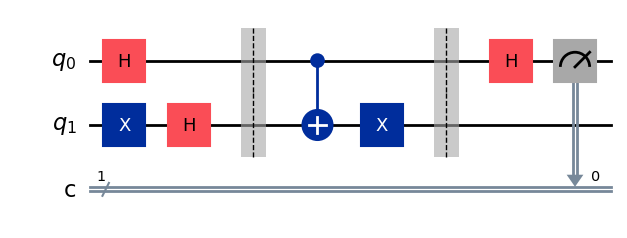

In [74]:
display(compile_circuit(deutsch_function(3)).draw('mpl'))

In [81]:
from qiskit_aer import AerSimulator

def deutsch_algorithm(function: QuantumCircuit):
    """
    Determine if a Deutsch function is constant or balanced.
    """
    qc = compile_circuit(function)

    result = AerSimulator().run(qc, shots=1, memory=True).result()
    # print("Result : ", result)
    measurements = result.get_memory()
    print("measurements : ",measurements)
    if measurements[0] == "0":
        return "constant"
    return "balanced"

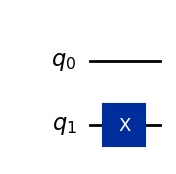

measurements :  ['0']


'constant'

In [82]:
f = deutsch_function(4)
display(f.draw('mpl'))
display(deutsch_algorithm(f))

In [54]:
from qiskit import QuantumCircuit
import numpy as np

def dj_function(num_qubits):
    """
    Create a random Deutsch-Jozsa function.
    """

    qc = QuantumCircuit(num_qubits + 1)
    print("np.random.randint(0, 2) " , np.random.randint(0, 2))
    if np.random.randint(0, 2):
        # Flip output qubit with 50% chance
        qc.x(num_qubits)
    print("np.random.randint(0, 2) " , np.random.randint(0, 2))
    if np.random.randint(0, 2):
        # return constant circuit with 50% chance
        return qc

    # next, choose half the possible input states
    on_states = np.random.choice(
        range(2**num_qubits),  # numbers to sample from
        2**num_qubits // 2,  # number of samples
        # 2**num_qubits,
        replace=False,  # makes sure states are only sampled once
    )
    print("onStates:", on_states)

    display(qc.draw())

    def add_cx(qc, bit_string):
        for qubit, bit in enumerate(reversed(bit_string)):
            if bit == "1":
                qc.x(qubit)
        return qc

    for state in on_states:
        qc.barrier()  # Barriers are added to help visualize how the functions are created. They can safely be removed.
        print("bit_string : ", f"{state:0b}")
        qc = add_cx(qc, f"{state:0b}")
        qc.mcx(list(range(num_qubits)), num_qubits)
        qc = add_cx(qc, f"{state:0b}")

    qc.barrier()

    return qc

np.random.randint(0, 2)  0
np.random.randint(0, 2)  0


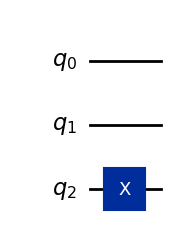







np.random.randint(0, 2)  1
np.random.randint(0, 2)  1
onStates: [1 3]


q_0: 
     
q_1: 
     
q_2:

bit_string :  1
bit_string :  11


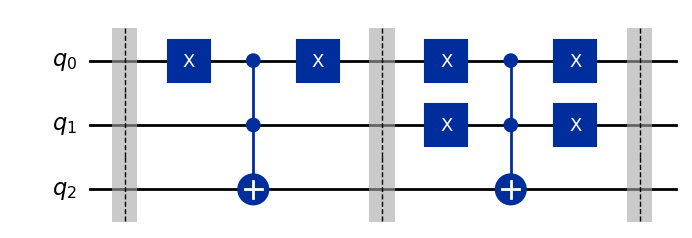







np.random.randint(0, 2)  1
np.random.randint(0, 2)  0


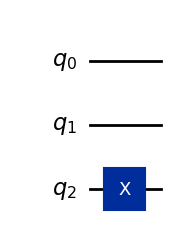







np.random.randint(0, 2)  0
np.random.randint(0, 2)  0
onStates: [0 1]


q_0: ─────
          
q_1: ─────
     ┌───┐
q_2: ┤ X ├
     └───┘

bit_string :  0
bit_string :  1


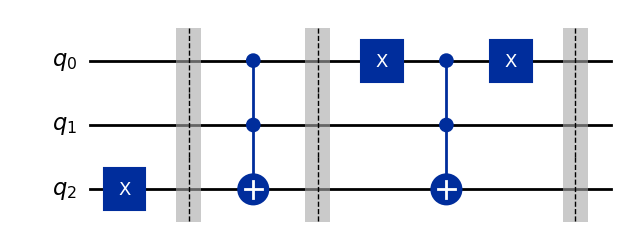







np.random.randint(0, 2)  1
np.random.randint(0, 2)  1
onStates: [2 3]


q_0: ─────
          
q_1: ─────
     ┌───┐
q_2: ┤ X ├
     └───┘

bit_string :  10
bit_string :  11


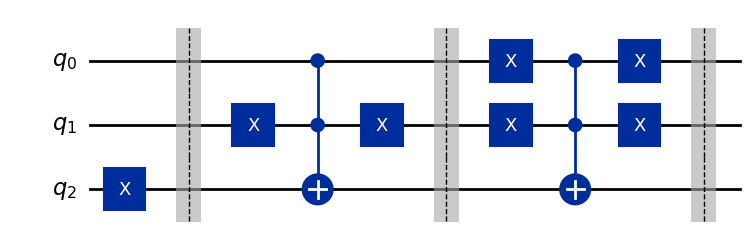







np.random.randint(0, 2)  1
np.random.randint(0, 2)  0


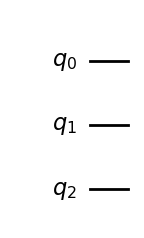







np.random.randint(0, 2)  0
np.random.randint(0, 2)  1


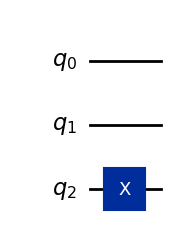







np.random.randint(0, 2)  1
np.random.randint(0, 2)  0
onStates: [3 1]


q_0: ─────
          
q_1: ─────
     ┌───┐
q_2: ┤ X ├
     └───┘

bit_string :  11
bit_string :  1


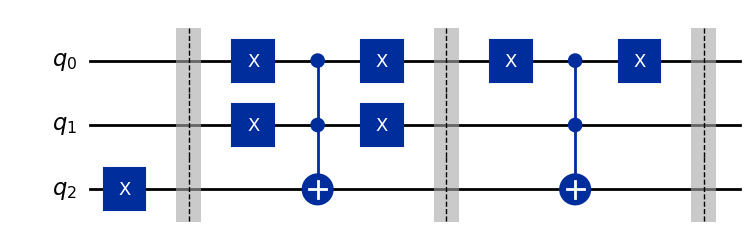







np.random.randint(0, 2)  1
np.random.randint(0, 2)  1
onStates: [0 2]


q_0: ─────
          
q_1: ─────
     ┌───┐
q_2: ┤ X ├
     └───┘

bit_string :  0
bit_string :  10


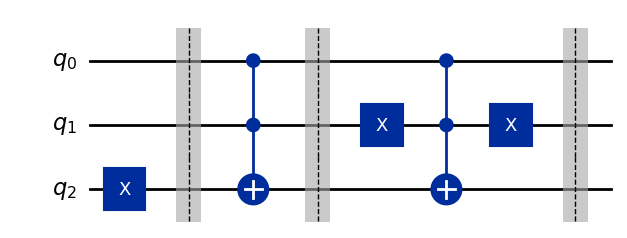







np.random.randint(0, 2)  0
np.random.randint(0, 2)  1
onStates: [3 2]


q_0: ─────
          
q_1: ─────
     ┌───┐
q_2: ┤ X ├
     └───┘

bit_string :  11
bit_string :  10


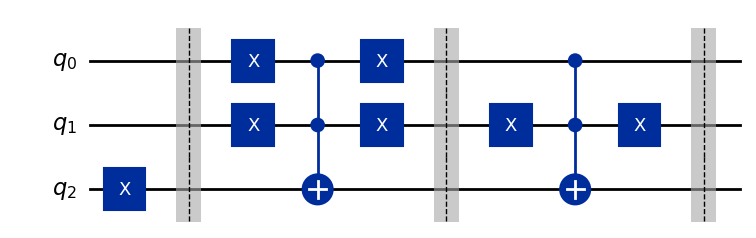

In [83]:
for i in range(10):
    display(dj_function(2).draw('mpl'))
    print("\n\n\n\n\n")

In [56]:
def compile_circuit(function: QuantumCircuit):
    """
    Compiles a circuit for use in the Deutsch-Jozsa algorithm.
    """
    n = function.num_qubits - 1
    qc = QuantumCircuit(n + 1, n)
    qc.x(n)
    qc.h(range(n + 1))
    qc.compose(function, inplace=True)
    qc.h(range(n))
    qc.measure(range(n), range(n))
    return qc

In [84]:
from qiskit_aer import AerSimulator

def dj_algorithm(function: QuantumCircuit):
    """
    Determine if a Deutsch-Jozsa function is constant or balanced.
    """
    qc = compile_circuit(function)

    print('dj algo : ')
    display(qc.draw('mpl'))

    result = AerSimulator().run(qc, shots=1, memory=True).result()
    measurements = result.get_memory()
    if "1" in measurements[0]:
        return "balanced"
    return "constant"

np.random.randint(0, 2)  1
np.random.randint(0, 2)  1


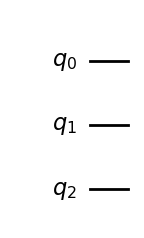

dj algo : 


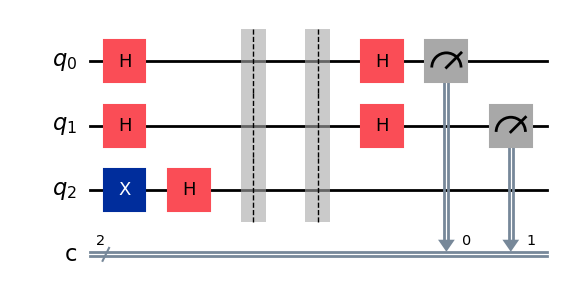

'constant'

In [86]:
f = dj_function(2)
display(f.draw('mpl'))
display(dj_algorithm(f))

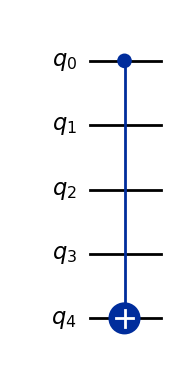

In [71]:
def bv_function(s):
    """
    Create a Bernstein-Vazirani function from a string of 1s and 0s.
    """
    qc = QuantumCircuit(len(s) + 1)
    for index, bit in enumerate(reversed(s)):
        if bit == "1":
            qc.cx(index, len(s))
    return qc

display(bv_function("0001").draw('mpl'))

In [64]:
def bv_algorithm(function: QuantumCircuit):
    qc = compile_circuit(function)
    result = AerSimulator().run(qc, shots=1, memory=True).result()
    return result.get_memory()[0]

display(bv_algorithm(bv_function("0001")))

'0001'

Expected bitstring: 1011
Measured bitstring: 1011


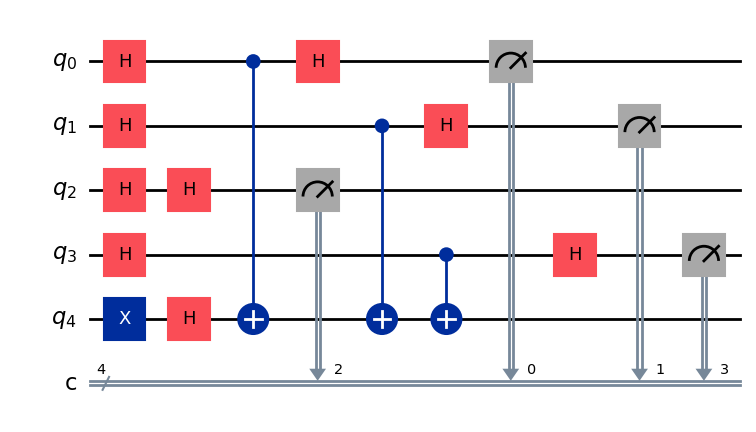

In [87]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator


def bv_function(s):
    """
    Create a Bernstein-Vazirani oracle function from a binary string s.
    """
    n = len(s)
    qc = QuantumCircuit(n + 1, n)  # Only measure the input qubits

    # Apply X gate to the output qubit to put it in |1⟩ state
    qc.x(n)

    # Apply Hadamard gates to all qubits
    qc.h(range(n + 1))

    # Apply CNOTs where s_i = 1
    for index, bit in enumerate(reversed(s)):  # Reverse to match Qiskit's qubit ordering
        if bit == "1":
            qc.cx(index, n)

    # Apply Hadamard to input qubits again (not the output qubit!)
    qc.h(range(n))

    # Measure only the input qubits
    qc.measure(range(n), range(n))

    return qc


def bv_algorithm(s):
    """
    Runs the Bernstein-Vazirani algorithm and extracts the hidden bitstring.
    """
    simulator = AerSimulator()
    qc = bv_function(s)  # Generate the Bernstein-Vazirani function circuit
    transpiled_qc = transpile(qc, simulator)  # Optimize circuit for the simulator
    result = simulator.run(transpiled_qc, shots=1, memory=True).result()
    return result.get_memory()[0]  # Return the measured bitstring


# Example usage
hidden_string = "1011"  # The secret string to encode in the oracle
print("Expected bitstring:", hidden_string)

# Run Bernstein-Vazirani Algorithm
measured_string = bv_algorithm(hidden_string)
print("Measured bitstring:", measured_string)

# Draw and display the circuit
bv_circuit = bv_function(hidden_string)
bv_circuit.draw('mpl')

In [130]:
# import random
import qiskit.quantum_info as qi
from qiskit import QuantumCircuit
import numpy as np

def simon_function(s: str):
    """
    Create a QuantumCircuit implementing a query gate for Simon problem obeying the promise for the hidden string `s`
    """
    # Our quantum circuit has 2n qubits for n = len(s)
    n = len(s)
    qc = QuantumCircuit(2 * n)

    # Define a random permutation of all n bit strings. This permutation will effectively hide the string s.
    pi = np.random.permutation(2**n)
    print("PI : ", pi)

    # Now we'll define a query gate explicitly. The idea is to first define a function g(x) = min{x,x ^ s}, which
    # is a simple function that satisfies the promise, and then we take f to be the composition of g and the random
    # permutation pi. This gives us a random function satisfying the promise for s.

    query_gate = np.zeros((4**n, 4**n))
    print("query_gate : ",query_gate)
    for x in range(2**n):
        for y in range(2**n):
            z = y ^ pi[min(x, x ^ int(s, 2))]
            query_gate[x + 2**n * z, x + 2**n * y] = 1

    # Print full matrix without truncation
    np.set_printoptions(threshold=np.inf, linewidth=200)  # Ensure full display
    print("Full Query Gate Matrix:")
    print(query_gate)

    # Our circuit has just this one query gate
    qc.unitary(query_gate, range(2 * n))
    display(qc.draw())
    return qc

In [131]:
from qiskit_aer import AerSimulator
from qiskit import ClassicalRegister

def simon_measurements(problem: QuantumCircuit, k: int):
    """
    Quantum part of Simon's algorithm. Given a `QuantumCircuit` that
    implements f, get `k` measurements to be post-processed later.
    """
    n = problem.num_qubits // 2

    qc = QuantumCircuit(2 * n, n)
    qc.h(range(n))
    qc.compose(problem, inplace=True)
    qc.h(range(n))
    qc.measure(range(n), range(n))

    display(qc.draw("mpl"))

    result = AerSimulator().run(qc, shots=k, memory=True).result()
    return result.get_memory()

PI :  [5 2 0 6 1 3 4 7]
query_gate :  [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
Full Query Gate Matrix:
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [

┌──────────┐
q_0: ┤0         ├
     │          │
q_1: ┤1         ├
     │          │
q_2: ┤2         ├
     │  Unitary │
q_3: ┤3         ├
     │          │
q_4: ┤4         ├
     │          │
q_5: ┤5         ├
     └──────────┘

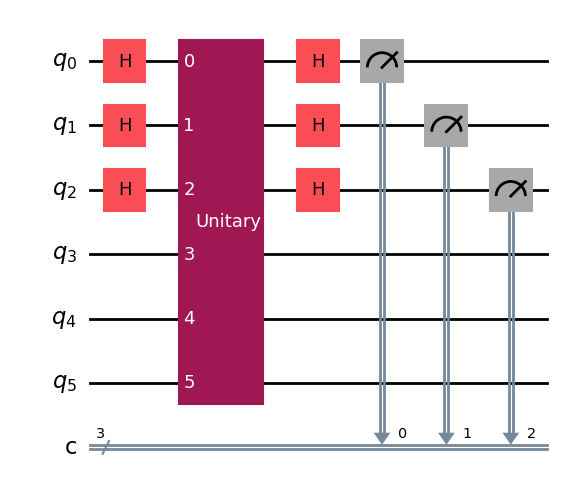

['010', '101', '000']

In [132]:
display(simon_measurements(simon_function("101"),k=3))

In [109]:
import numpy as np
import galois

def simon_algorithm(problem: QuantumCircuit):
    """
    Given a `QuantumCircuit` that implements a query gate for Simon problem, return the hidden string `s`.
    """

    # Quantum part: run the circuit defined previously k times and gather the measurement results.
    # Replace +10 by +r for any nonnegative integer r depending on desired confidence.

    measurements = simon_measurements(problem, k=problem.num_qubits // 2 + 10)
    print("Measurement results:")
    display(measurements)

    # Classical post-processing:

    # 1. Convert measurements of form '11101' to 2D-array of integers
    matrix = np.array([list(bitstring) for bitstring in measurements]).astype(int)

    # 2. Interpret matrix as using arithmetic mod 2, and find null space
    null_space = galois.GF(2)(matrix).null_space()
    print("Null space:")
    display(null_space)

    # 3. Convert back to a string
    print("Guess for hidden string s:")
    if len(null_space) == 0:
        # No non-trivial solution; `s` is all-zeros
        return "0" * len(measurements[0])
    return "".join(np.array(null_space[0]).astype(str))

In [111]:
display(simon_algorithm(simon_function("10011")))

PI :  [14 16 26  0 10 19 27 25  3  8  6 28 22 17 11 12  9  7  4 13 29 23  5 18
 15  2 24 20 31  1 21 30]
query_gate :  [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
Measurement results:


['00111',
 '11001',
 '11110',
 '00011',
 '11010',
 '01000',
 '11101',
 '00100',
 '00011',
 '01011',
 '01111',
 '00111',
 '10010',
 '00000',
 '00111']

Null space:


GF([[1, 0, 0, 1, 1]], order=2)

Guess for hidden string s:


'10011'